# Visualization

In [8]:
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline

## The .plot() Method

In [9]:
amzn = data.DataReader('AMZN','iex',start='2017-01-01',end='2017-12-31')
amzn.head()

,open,high,low,close,volume
date,,,,,
2017-01-03,757.92,758.7595,747.7000,753.67,3521066
2017-01-04,758.39,759.6800,754.2000,757.18,2510526
2017-01-05,761.55,782.3999,760.2557,780.45,5830068
2017-01-06,782.36,799.4400,778.4800,795.99,5986234
2017-01-09,798.00,801.7742,791.7700,796.92,3446109


In [10]:
amzn.reset_index(inplace=True)
amzn['date'] = pd.to_datetime(amzn['date'])
amzn.set_index('date',inplace=True)
amzn.head()

,open,high,low,close,volume
date,,,,,
2017-01-03,757.92,758.7595,747.7000,753.67,3521066
2017-01-04,758.39,759.6800,754.2000,757.18,2510526
2017-01-05,761.55,782.3999,760.2557,780.45,5830068
2017-01-06,782.36,799.4400,778.4800,795.99,5986234
2017-01-09,798.00,801.7742,791.7700,796.92,3446109


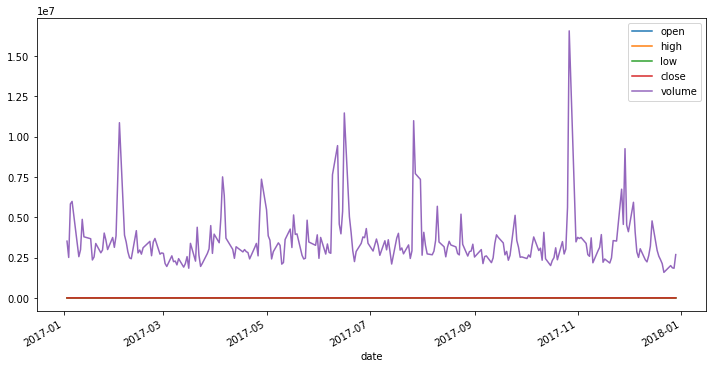

In [12]:
amzn.plot(figsize=(12,6))

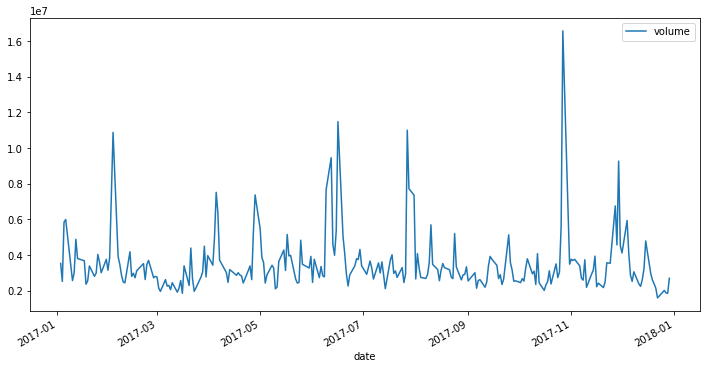

In [14]:
amzn.plot(y='volume',figsize=(12,6))

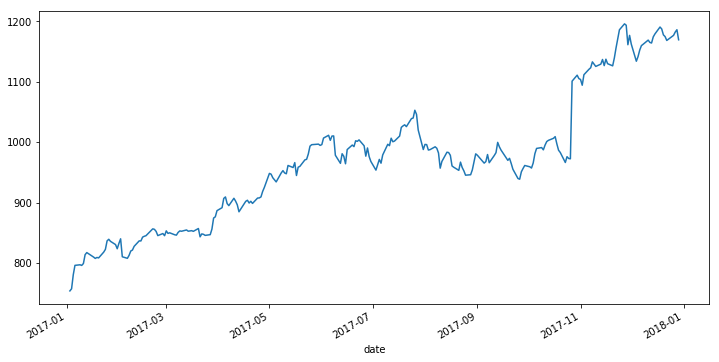

In [13]:
amzn['close'].plot(figsize=(12,6))

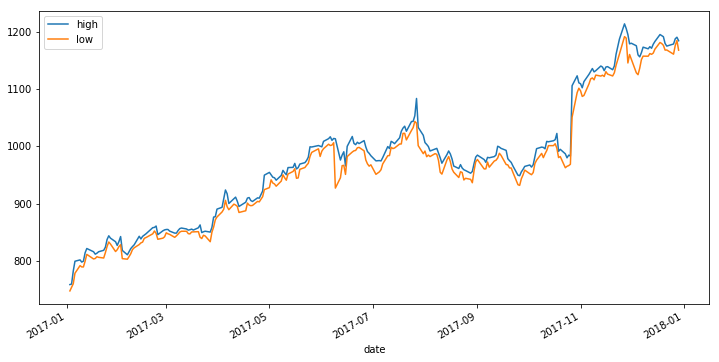

In [15]:
amzn[['high','low']].plot(figsize=(12,6))

## Modifying Asthetics

In [17]:
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

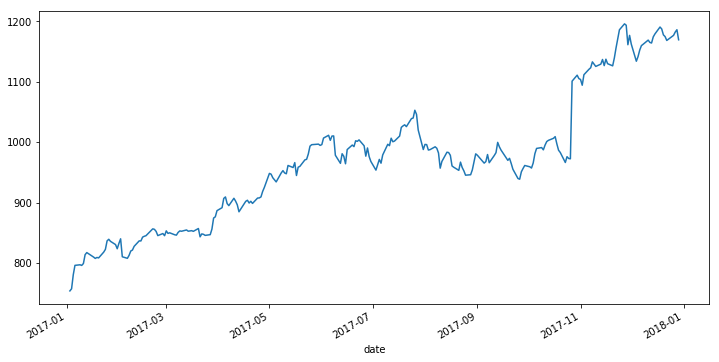

In [18]:
amzn['close'].plot(figsize=(12,6))

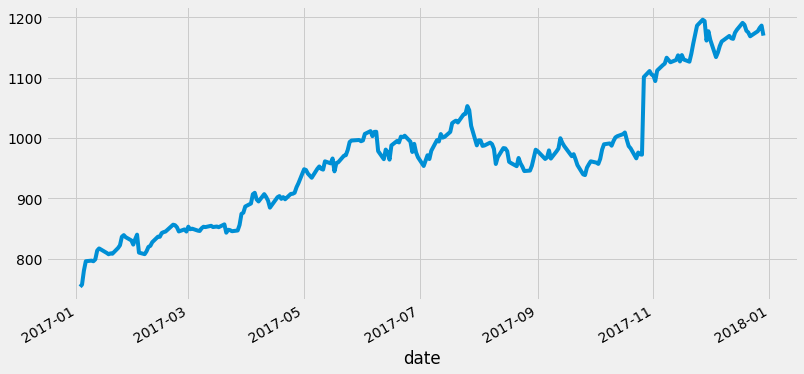

In [19]:
plt.style.use('fivethirtyeight')
amzn['close'].plot(figsize=(12,6))

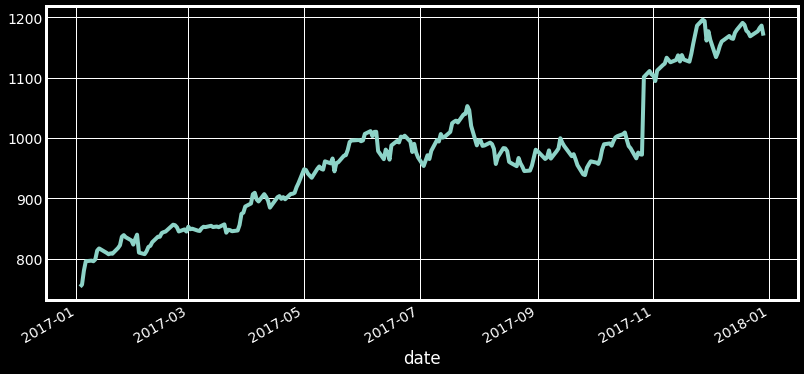

In [20]:
plt.style.use('dark_background')
amzn['close'].plot(figsize=(12,6))

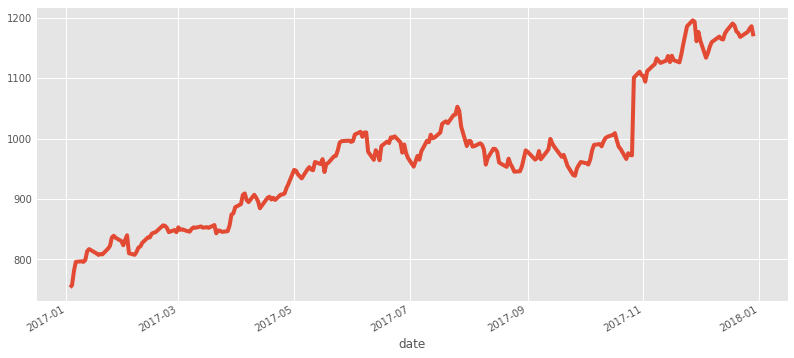

In [21]:
plt.style.use('ggplot')
amzn['close'].plot(figsize=(12,6))

## Bar Charts

In [28]:
def rank_price(stock_price):
    if stock_price <= 800:
        return 'Poor'
    elif stock_price > 800 and stock_price <= 1000:
        return 'Satisfactory'
    else:
        return 'Stellar'

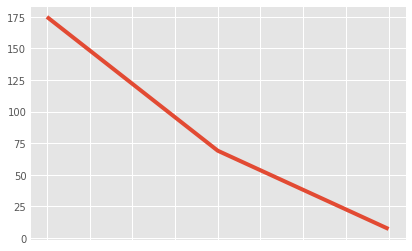

In [31]:
amzn['close'].apply(rank_price).value_counts().plot()

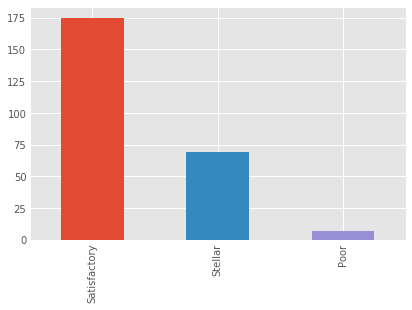

In [32]:
amzn['close'].apply(rank_price).value_counts().plot(kind='bar')

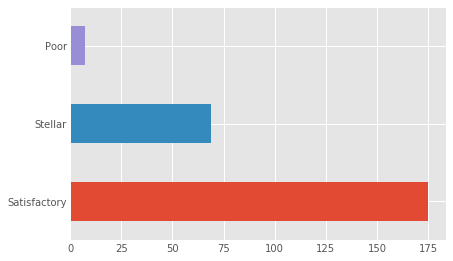

In [33]:
amzn['close'].apply(rank_price).value_counts().plot(kind='barh')

## Histograms

In [36]:
def buckets(stock_price):
    return int(stock_price/100)*100

In [38]:
amzn['high'].apply(buckets).value_counts().sort_index()

700       6
800      58
900     107
1000     36
1100     42
1200      2
Name: high, dtype: int64

In [40]:
amzn['high'].apply(buckets).nunique()

6

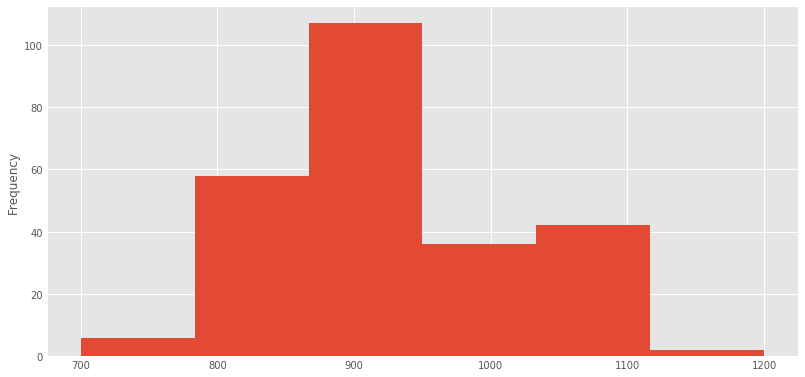

In [42]:
amzn['high'].apply(buckets).plot(kind='hist',figsize=(12,6),bins=6)